In [27]:
import pandas as pd

# Load the CSV files with the correct encoding
korea_df = pd.read_csv('/Users/wonjds/Documents/python/korea.csv', encoding='ISO-8859-1')
global_df = pd.read_csv('/Users/wonjds/Documents/python/global.csv', encoding='ISO-8859-1')
# Remove the first row of each DataFrame
# Display the first few rows of each DataFrame to verify the data
print(korea_df.head())
print(global_df.head())

         Date  Search
0   2019.9.29       0
1   2019.10.6       0
2  2019.10.13       0
3  2019.10.20       0
4  2019.10.27       0
         Date  Search
0   2019.9.29       8
1   2019.10.6       0
2  2019.10.13       5
3  2019.10.20       0
4  2019.10.27       5


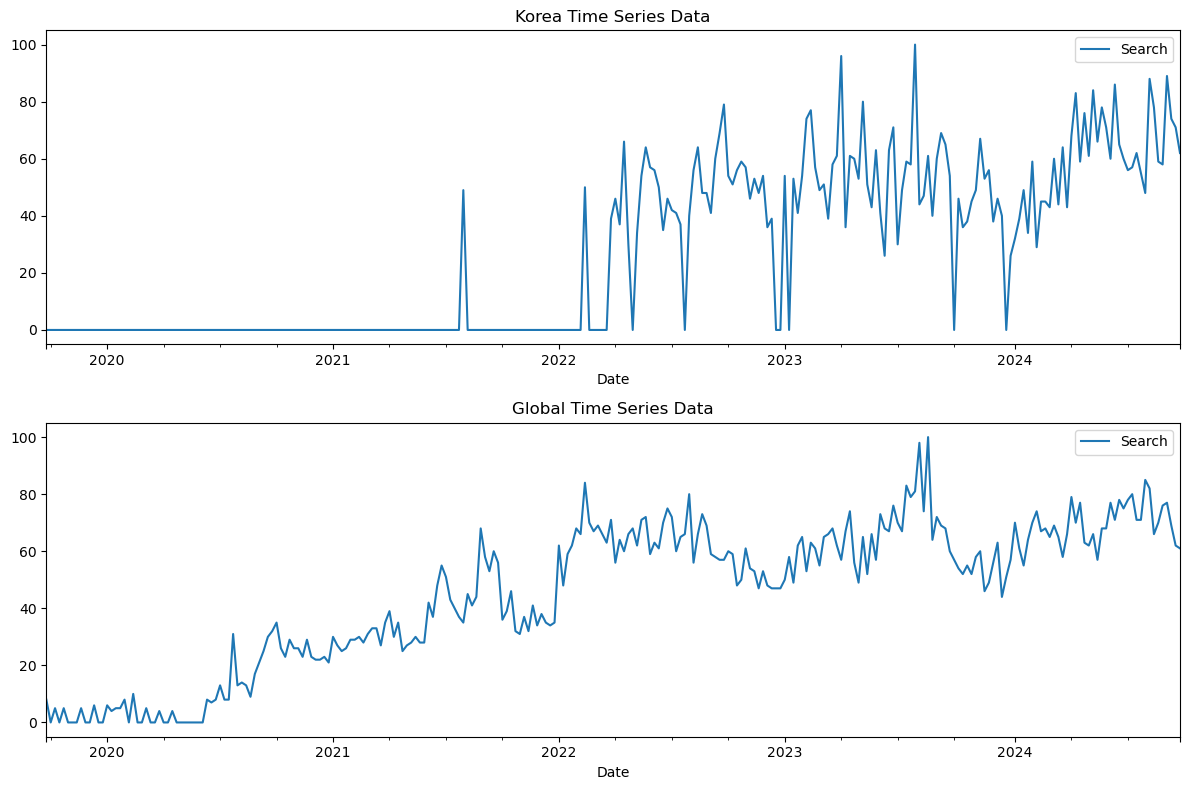

In [28]:
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format
korea_df['Date'] = pd.to_datetime(korea_df['Date'])
global_df['Date'] = pd.to_datetime(global_df['Date'])

# Set the 'Date' column as the index
korea_df.set_index('Date', inplace=True)
global_df.set_index('Date', inplace=True)

# Plot the time series data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

korea_df.plot(ax=axes[0], title='Korea Time Series Data')
global_df.plot(ax=axes[1], title='Global Time Series Data')

plt.tight_layout()
plt.show()

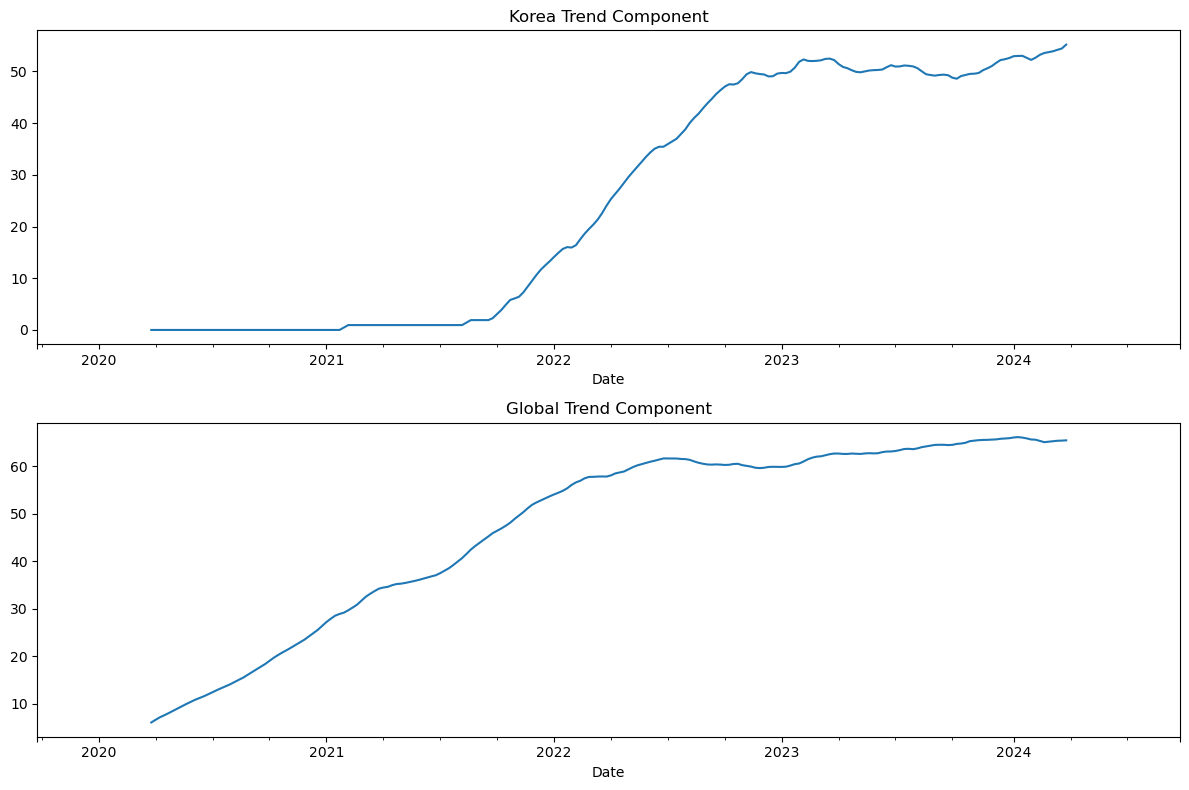

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data for Korea
korea_decomposition = seasonal_decompose(korea_df['Search'], model='additive')
korea_trend = korea_decomposition.trend

# Decompose the time series data for Global
global_decomposition = seasonal_decompose(global_df['Search'], model='additive')
global_trend = global_decomposition.trend

# Plot the trend components
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

korea_trend.plot(ax=axes[0], title='Korea Trend Component')
global_trend.plot(ax=axes[1], title='Global Trend Component')

plt.tight_layout()
plt.show()

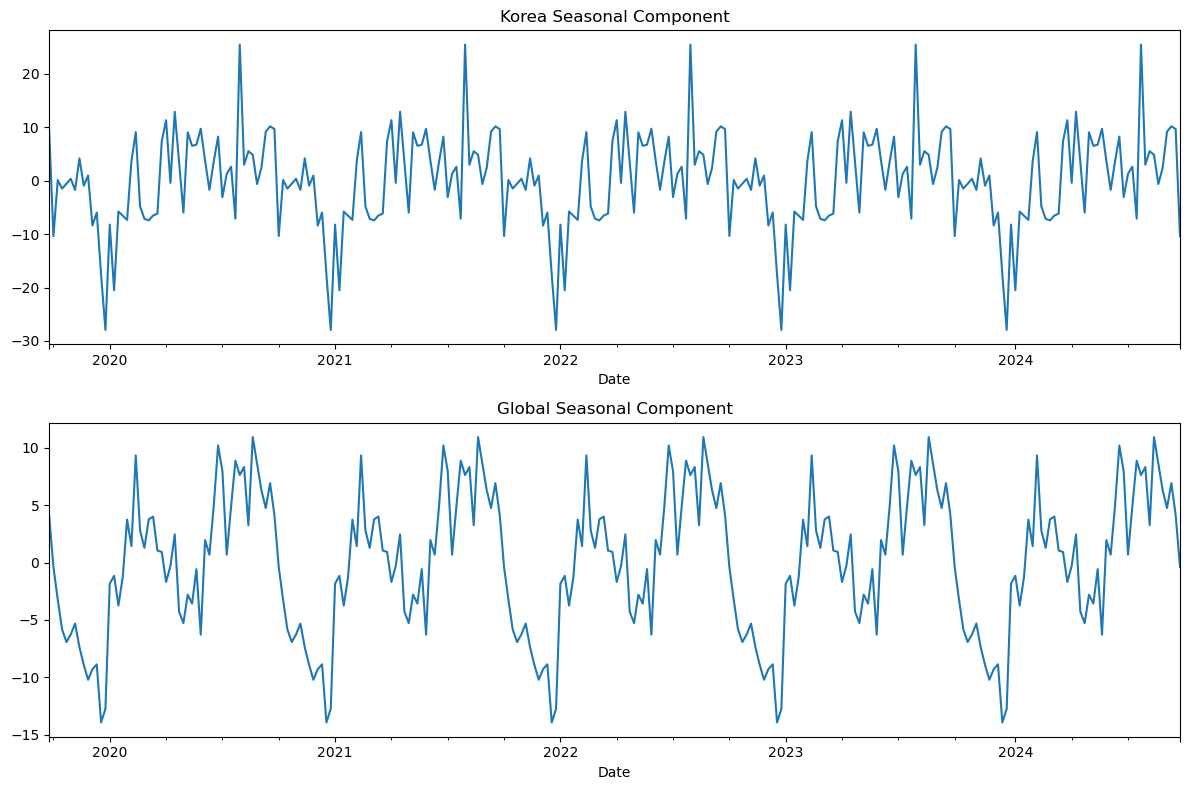

In [30]:
# Extract the seasonal components
korea_seasonal = korea_decomposition.seasonal
global_seasonal = global_decomposition.seasonal

# Plot the seasonal components
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

korea_seasonal.plot(ax=axes[0], title='Korea Seasonal Component')
global_seasonal.plot(ax=axes[1], title='Global Seasonal Component')

plt.tight_layout()
plt.show()

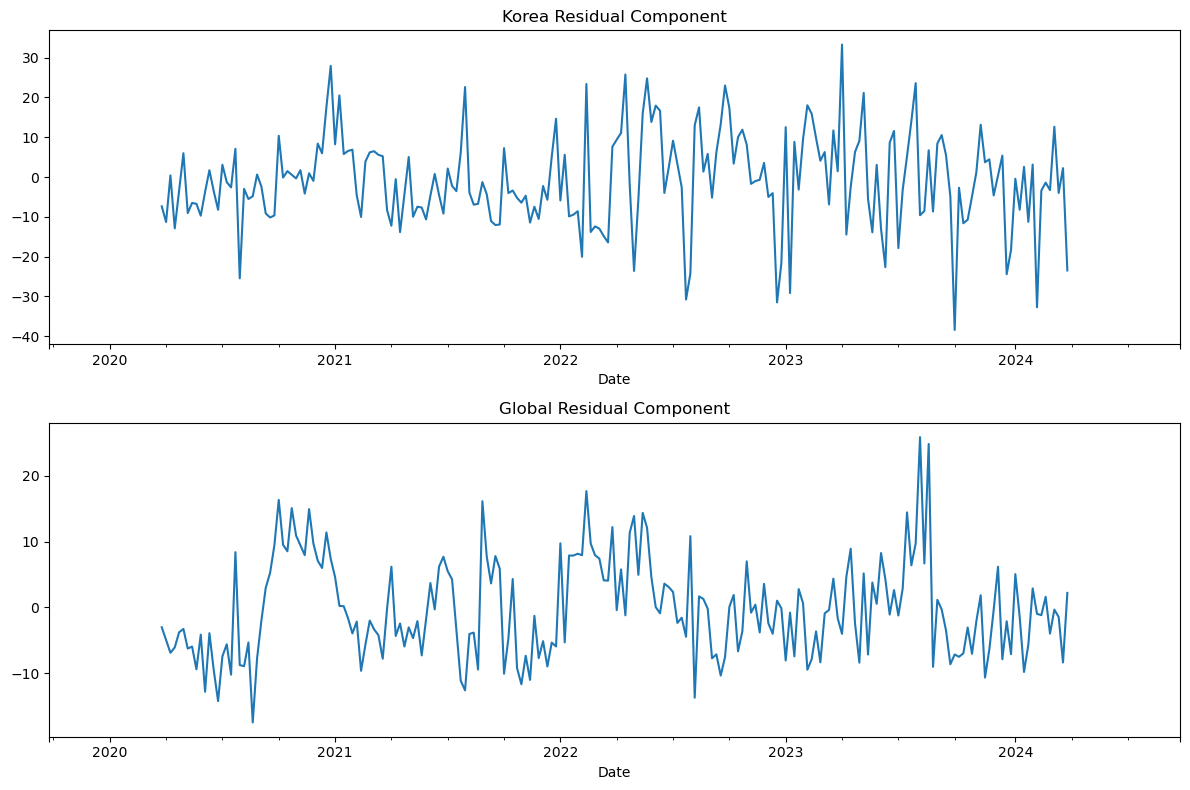

In [31]:
# Extract the residual components (observed - trend - seasonal)
korea_residual = korea_decomposition.resid
global_residual = global_decomposition.resid

# Plot the residual components
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

korea_residual.plot(ax=axes[0], title='Korea Residual Component')
global_residual.plot(ax=axes[1], title='Global Residual Component')

plt.tight_layout()
plt.show()

# 에어비앤비의 설문 결과

에어비앤비(Airbnb)는 온라인 설문조사를 통하여 워케이션에 대한 인식 조사를 실시하였으며 <그림 1>과 같이 국내에서도 응답자의 61%가 ‘가능하다면 집이 아닌 다른 곳에서 워케이션을 시도해 볼 의향이 있다’고 답하여 전반적으로 워케이션과 관련하여 긍정적인 참여 의향을 보였으며 워케이션을 보내고 싶은 장소에 관한 응답에서는 74%가 국내 해안가나 지방을 가장 선호하는 것으로 나타났다.

![파이차트](/Users/wonjds/Documents/python/파이차트.png)

출처 : 이연수. (2022). 워케이션 환경을 고려한 업무공간 디자인 방향성 제안. 한국실내디자인학회 논문집, 31(6), 123-130, 10.14774/JKIID.2022.31.6.123

# 워케이션 시장의 성장과 인식변화

![시장](/Users/wonjds/Documents/python/시장.png)
1) 일본 워케이션 시장규모 변화는 Statista를 통해 수집한 데이터 중 Yano 경제연구소의 워케이션 시장 동향 조사를 활용하여 작성됨.
2) 한국관광공사의 ‘워케이션 실태조사 및 워케이션 방한관광 활성화 방안 연구’의 기업 인사담당자 대상 인식조사 결과를 활용였으며, 설문응답항목 중 ‘매우 동의한다’와 ‘동의한다’를 ‘긍정’, ‘보통이다’를 ‘보통’, ‘동의하지 않는다’와 ‘매우 동의하지 않는다’를 ‘부정’으로 분석함.

출처 : Statista(2021); Yano Research(2021).

한국관광공사(2021), 워케이션 실태조사 및 워케이션 방한관광 활성화 방안 연구